In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [2]:
# Tried a few things:
# More convolution layers did not increase accuracy
# BatchNorm helps the training initialy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from core_functions import SensorSignals

# Model with usual halving of image size and doubling the depth
class CNN_STANDARD(nn.Module):    
    def __init__(self):
        super(CNN_STANDARD, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_2(nn.Module):    
    def __init__(self):
        super(CNN_2, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(32 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_3(nn.Module):    
    def __init__(self):
        super(CNN_3, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(64 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

    
class CNN_5(nn.Module):    
    def __init__(self):
        super(CNN_5, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(8, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [4]:
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath) 
S.split_data()
S.norm_X()
S.setup_tensors()
S.print_shapes()

# for CNN_STANDARD
# lr=5e-3, wd=1e-4

# with BatchNorm1d
# lr=1e-2, wd=1e-3

models, models_losses, models_acc, models_label = [], [], [], []
# for i, (model, lr, wd) in enumerate(zip([CNN_4(), CNN_STANDARD()], [1e-2, 5e-3], [1e-3, 1e-4])):
for i, model in enumerate([CNN_2()]): 
    lr = 1e-2
    wd = 1e-3

    # Train
    S.train_model(model, learning_rate=lr, batch_size=128, max_epochs=100, weight_decay=wd)

    models.append(model)
    models_losses.append(S.losses)
    models_acc.append(S.accuracies)
    models_label.append(f"model {i}")

Before: 3.045220350877193
Normalizing dataset by 3.05
After: 1.0
Before: 3.0533344594594594
Normalizing dataset by 3.05
After: 1.0026645390636277
Before: 3.0294538232373385
Normalizing dataset by 3.05
After: 0.9948225330770193
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7891, 1, 32)
Labels shape:  (7891,)
Unique labels:  [0 1 2]
Shape of test set: (1184, 1, 32)
Shape of train set: (5700, 1, 32)
Shape of validation set: (1007, 1, 32)
Fraction of single class in test set:  0.2981418918918919
Epoch 1, Batch 1: loss=1.300, train=54.1%, val=56.3%
Epoch 2, Batch 1: loss=0.487, train=78.7%, val=80.4%
Epoch 3, Batch 1: loss=0.397, train=83.0%, val=83.8%
Epoch 4, Batch 1: loss=0.533, train=81.6%, val=83.5%
Epoch 5, Batch 1: loss=0.447, train=86.1%, val=86.9%
Epoch 6, Batch 1: loss=0.354, train=86.1%, val=87.7%
Epoch 7, Batch 1: loss=0.369, train=86.4%, val=86.6%
Epoch 8, Batch 1: loss=0.285, train=87.4%, val=89.0%
Epoch 9, Batch 1: loss=0.357, train=88.3%, val=88.2%
Epoch 10, B

Accuracy of test set of best model (idx=0): 89.4%


0.8944256756756757

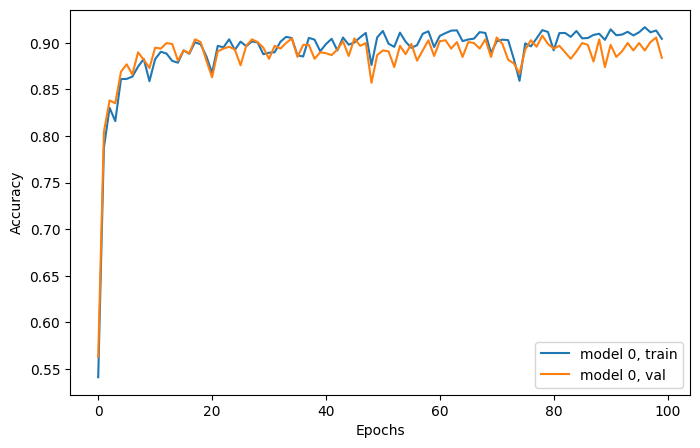

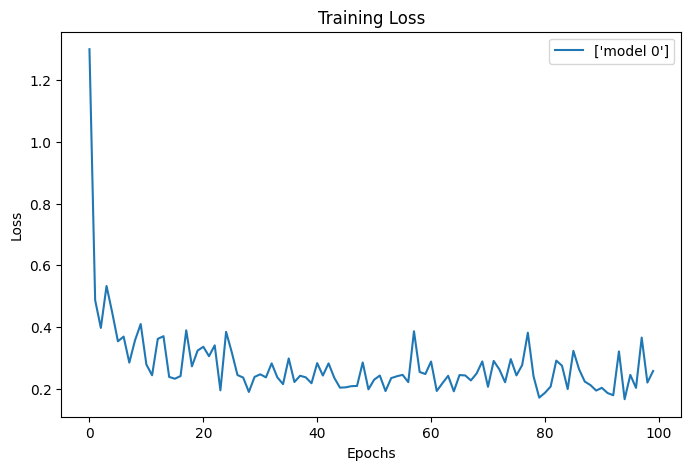

In [6]:
# Plot results from training
def plotAcc(models_label, models_acc):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    for lab, accs in zip(models_label, models_acc):
        plt.plot(np.arange(accs.shape[0]), accs, label=[lab+", train", lab+", val"])
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")


def plotLosses(models_label, models_losses):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    plt.title("Training Loss")
    models_losses = np.array(models_losses)
    plt.plot(np.arange(models_losses.shape[1]), models_losses.T, label=models_label)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    
    
def bestModelAcc(models, models_acc, S):
    """
    Prints test accuracy of best model
    Chooses model that yields the best validation accuracy
    S is object containing the data used during training 
    """
    best_acc_idx = np.argmax([acc[-1, -1] for acc in models_acc])
    best_model = models[best_acc_idx]
    best_acc = S.acc_te(best_model)
    print(f"Accuracy of test set of best model (idx={best_acc_idx}): {best_acc*100:.1f}%")
    return best_acc 

# Plot
plotAcc(models_label, models_acc)
plotLosses(models_label, models_losses)
# Print accuracy
bestModelAcc(models, models_acc, S)

In [22]:
from itertools import combinations

n_channels = 3
def get_combinations(X, N=10000):

    C = combinations(X, n_channels)

    shape = N + X.shape[1:]
    print(shape)
    result = np.zeros(shape)
    for i in range(N):
        result[i] = C.__next__()
    return result

X = np.arange(15).reshape(5, 3)
r = get_combinations(X)
r

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'